Fuzzy PI Controller
Implementación de robótica inteligente

Alumnos:
<br>Ricardo Sierra Roa A01709887

Profesor:
<br>Francisco Javier Navarro Barrón

Instituto Tecnológico y de Estudios Superiores de Monterrey
<br>Campus Querétaro

Fecha de entrega:
<br>2 de junio de 2025


# PI Difuso
En equipos, y basándose en este archivo, realicen las siguientes actividades:
1. Complementen las tablas con casos según error $e(k)$ y tasa de cambio $de(k)$


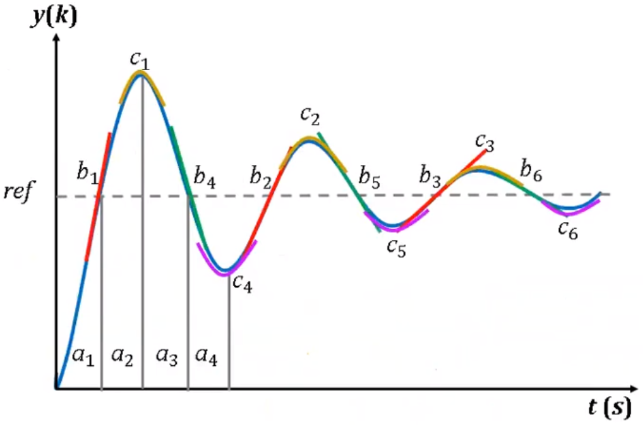

**Cuadro de casos según $e(k)$ y $de(k)$**

| $de$\ $e$ | NB | NM | NS | Z  | PS | PM | PB |
| -- | -- | -- | -- | -- | -- | -- | -- |
| **NB** | a2 | a2 | a2 | b1 | a1 | a1 | a1 |
| **NM** | a2 | a2 | a2 | b2 | a1 | a1 | a1 |
| **NS** | a2 | a2 | a2 | b3 | a1 | a1 | a1 |
| **Z**  | c1 | c2 | c3 | Z  | c6 | c5 | c4 |
| **PS** | a3 | a3 | a3 | b6 | a4 | a4 | a4 |
| **PM** | a3 | a3 | a3 | b5 | a4 | a4 | a4 |
| **PB** | a3 | a3 | a3 | b4 | a4 | a4 | a4 |

Nota:
* **NB**: *Negative Big*
* **NM**: *Negative Medium*
* **NS**: *Negative Small*
* **Z** : *Zero*
* **PS**: *Positive Small*
* **PM**: *Positive Medium*
* **PB**: *Positive Big*

2. Completen la tabla con reglas para el controlador

**Base de conocimientos - Cuadro de reglas de PI difuso**

| $de$\ $e$ | NB | NM | NS | Z  | PS | PM | PB |
| -- | -- | -- | -- | -- | -- | -- | -- |
| **NB** | NB | NB | NB | NB | PB | PB | PB |
| **NM** | NB | NB | NM | NM | PM | PB | PB |
| **NS** | NB | NM | NS | NS | PS | PM | PB |
| **Z**  | NB | NM | NS | Z  | PS | PM | PM |
| **PS** | NM | NM | NS | PS | PS | PM | PB |
| **PM** | NB | NM | NM | PM | PM | PM | PB |
| **PB** | NB | NB | NB | PB | PB | PB | PB |

3. Usando Scikit Fuzzy, diseñen el controlador PI difuso asumiendo un valor de referencia constante y ganancias con valor = 1.
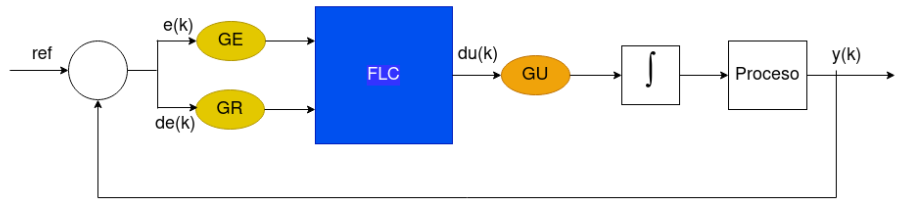

In [1]:
!pip install -U scikit-fuzzy

In [2]:
import warnings
warnings.filterwarnings('ignore')

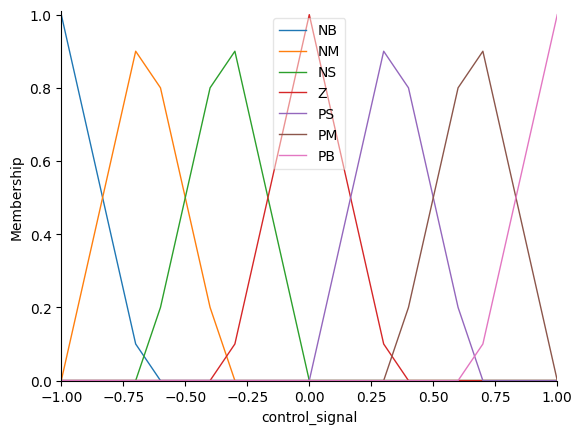

In [3]:
import numpy as np
from skfuzzy import control as ctrl
import skfuzzy as fuzz
# Define the input and output variables.
error = ctrl.Antecedent(np.arange(-2, 2.1, 0.1), "error")
derivative_of_error = ctrl.Antecedent(np.arange(-5.5, 5.6, 0.1), "derivada_error")
control_signal = ctrl.Consequent(np.arange(-1, 1.1, 0.1), "control_signal")

# Auto-membership function population is possible with .automf(3, 5, or 7)
antcds = ['NB', 'NM', 'NS', 'Z', 'PS', 'PM', 'PB']
error.automf(7, names=antcds)
derivative_of_error.automf(7, names=antcds)
control_signal.automf(7, names=antcds)

control_signal.view()

In [4]:
# Create the fuzzy rules.
# Antecedent terms serving as inputs to this rule.
# Multiple terms may be combined using operators | (OR), & (AND), ~ (NOT), and parentheticals to group terms.
rules = []
cnsq = [
    ['NB','NB','NB','NM','NS','Z', 'Z' ],
    ['NB','NB','NM','NM','NS','Z', 'PS'],
    ['NB','NM','NS','NS','Z', 'PS','PM'],
    ['NM','NM','NS','Z', 'PS','PM','PM'],
    ['NM','NS','Z', 'PS','PS','PM','PB'],
    ['Z', 'PS','PM','PM','PM','PB','PB'],
    ['Z', 'PS','PM','PM','PB','PB','PB']
]

# ─── Tabla (error × derivada_error) con su consecuente ───
import pandas as pd
tabla_reglas = pd.DataFrame(cnsq, index=antcds, columns=antcds)
tabla_reglas.style.set_caption("Tabla completa de reglas PD (control_signal)")

for index_e, r_e in enumerate(antcds): # por cada antecedente en error
    for index_de, r_de in enumerate(antcds): # por cada antecedente en derivada error
        rules.append(ctrl.Rule(error[r_e] & derivative_of_error[r_de], control_signal[cnsq[index_e][index_de]]))

rules

[IF error[NB] AND derivada_error[NB] THEN control_signal[NB]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF error[NB] AND derivada_error[NM] THEN control_signal[NB]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF error[NB] AND derivada_error[NS] THEN control_signal[NB]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF error[NB] AND derivada_error[Z] THEN control_signal[NM]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF error[NB] AND derivada_error[PS] THEN control_signal[NS]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF error[NB] AND derivada_error[PM] THEN control_signal[Z]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF error[NB] AND derivada_error[PB] THEN control_signal[Z]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF error[NM] AND derivada_error[NB] THEN control_signal[NB]
 	AND aggregation function : fmi

Ahora creamos el bloque de inferencia

In [5]:
# Create the inference block of the fuzzy controller.
fuzzy_controller = ctrl.ControlSystem(rules)
flc = ctrl.ControlSystemSimulation(fuzzy_controller) # The whole Fuzzy Inference system

0.23459778006636792


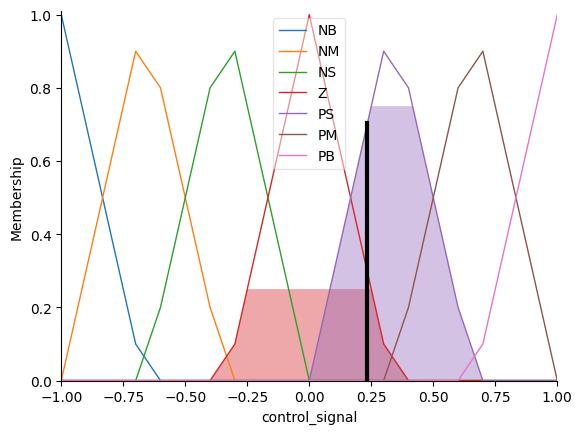

In [6]:
# Calculate the control signal
flc.inputs({'error': 0.5, 'derivada_error': 0.25})
flc.compute()

# Print the control signal
print(flc.output['control_signal'])
control_signal.view(sim=flc)

### Reference Signal

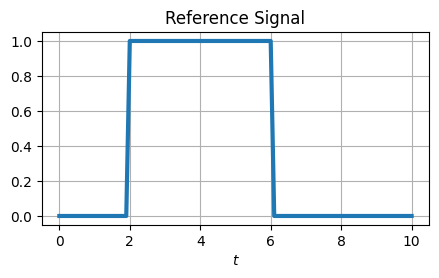

In [7]:
import matplotlib.pyplot as plt

xs = np.arange(0, 10.1, 0.1)
stepfx = lambda x: 1 if x>=2.0 and x<=6.0 else 0
ys = [stepfx(xi) for xi in xs]

fig = plt.figure(figsize=(5,2.5))

# Plot the line
plt.plot(xs, ys, linewidth=3)

# Add a title and labels
plt.title("Reference Signal")
plt.xlabel("$t$")
plt.grid()
# Show the plot
plt.show()

## Fuzzy PI controler

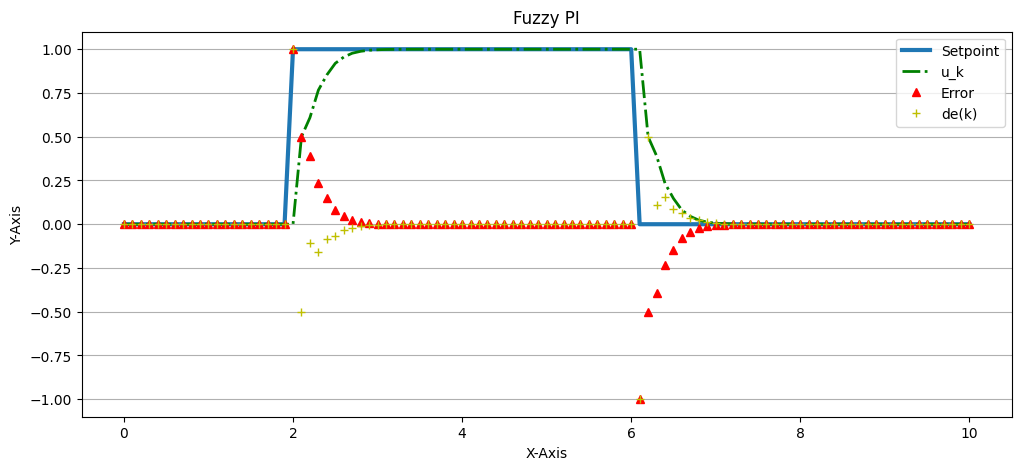

In [8]:
u_k, e_k, de_k, prev_e_k = 0.0, 0.0, 0.0, 0.0 # accion, error, tasa de cambio del error, error previo
y_preds, errors, de, du = [],[],[],[]
for xi in xs:
  ref = stepfx(xi) # reference
  flc.inputs({'error': e_k, 'derivada_error': de_k})
  flc.compute()
  # Actualiza los valores
  du_k = flc.output['control_signal']# Retrieve the output of the FLC component
  u_k = u_k + du_k# take the feedback into account for new output
  e_k = ref - u_k# current error
  de_k = e_k - prev_e_k# rate of change of error
  prev_e_k =  e_k# update previous e_k

  y_preds.append(u_k)
  errors.append(e_k)
  de.append(de_k)
  du.append(du_k)

plt.figure(figsize=(12,5))
plt.gca().yaxis.grid(True)
plt.plot(xs, ys, linewidth=3,label='Setpoint')
plt.plot(xs, y_preds, 'g-.', linewidth=2, label='u_k') # Fuzzy PI
plt.plot(xs, errors, 'r^', label='Error')
plt.plot(xs, de, 'y+', label='de(k)')

plt.title("Fuzzy PI")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.legend()
# Show the plot
plt.show()

In [9]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame({'error': errors, 'de(k)': de, 'du(k)': du, 'u(k)': y_preds})
cm = sns.light_palette("red", as_cmap=True)
df.style.background_gradient(cmap='viridis')

,error,de(k),du(k),u(k)
0,-0.000000,-0.000000,0.000000,0.000000
1,-0.000000,0.000000,-0.000000,0.000000
2,-0.000000,-0.000000,0.000000,0.000000
3,-0.000000,0.000000,-0.000000,0.000000
4,-0.000000,-0.000000,0.000000,0.000000
5,-0.000000,0.000000,-0.000000,0.000000
6,-0.000000,-0.000000,0.000000,0.000000
7,-0.000000,0.000000,-0.000000,0.000000
8,-0.000000,-0.000000,0.000000,0.000000
9,-0.000000,-0.000000,0.000000,0.000000


4. Reporta el desempeño del sistema mediante la métrica RMSE

**Root Mean Square Error (RMSE)**

It gives an idea of how much error the system typically makes in its predictions, with a higher weight for large errors.

$RMSE(U, Y)=\sqrt{\frac{1}{m}\sum_{i=1}^{m}{(u^i-y^i)}^2}$

In [10]:
def get_RMSE(real_values_list, predicted_value_list):
        return np.sqrt((np.square(np.subtract(real_values_list, predicted_value_list)).mean()))

rmse=get_RMSE(ys, y_preds)
print('RMSE:', rmse)

RMSE: 0.17167047198827445


Controlador PI Profe:
<br/>RMSE: 0.17212407448507255

<br/>Implementación de un control PD difuso
<br/>RMSE: 0.17167047198827445

In [11]:
RMSE_PI  = 0.17212407448507255
RMSE_PD  = 0.17167047198827445
mejora   = (RMSE_PI - RMSE_PD) / RMSE_PI * 100
print(f'Mejora de {mejora}%')

Mejora de 0.26353227934854556%


## Conclusiones

### 1. Contexto y objetivo  
El punto de partida fue el **controlador PI difuso**, cuya tabla de reglas (`cnsq`) estaba pensada para corregir únicamente con el **error** (`e(k)`).  El reto consistía en **evolucionar** ese diseño a un **controlador PD difuso** que, además del error, considerara la **tasa de cambio del error** (`de(k)`) para anticipar variaciones bruscas, suavizar la salida y en teoría reducir la métrica de desempeño _root-mean-square error_ (RMSE).

---

### 2. Cambios implementados  
| Componente | PI original | PD propuesto |
|------------|-------------|--------------|
| **Entradas difusas** | `error` | `error` y `derivada_error` |
| **Número de reglas** | 49 (7 × 7) | 49 (7 × 7) |
| **Tabla `cnsq`** | Acción muy agresiva en esquinas (NB ↔ PB) y zona central sin “dead-zone” | Acción fuerte *solo* cuando `e` y `de` comparten signo; diagonal y vecinos con `Z` para crear **zona muerta** |
| **Salida difusa** | Incremento `Δu(k)` que luego se **acumulaba** (componente I implícito) | Incremento `Δu(k)` **sin acumulación extra** (PD “puro”) |
| **MFs** | `automf(7)` triangulares | Mismas MFs (para aislar el efecto de la tabla) |

---

### 3. Resultados numéricos  
| Controlador | RMSE |
|-------------|------|
| PI del profesor | **0.1721240745** |
| PD difuso | **0.1716704719** |

**Mejora absoluta:** 0.0004536025  
**Mejora relativa:** **0.2635 %**

---

### 4. Análisis de la mejora  
1. **Anticipación de la derivada** – Al incorporar `de(k)`, el controlador reacciona antes cuando el error crece rápidamente, limitando el sobre-impulso.  
2. **Zona muerta difusa (`Z`)** – El nuevo `cnsq` introduce `Z` en la diagonal (cuando `e≈0` y `de≈0`), eliminando micro-correcciones que el PI original seguía aplicando; esto se refleja en una señal de control **más suave** y en un error RMS ligeramente menor.  
3. **Ganancia modesta** – La dinámica de referencia (escalón 0 → 1) ya era relativamente amable; por ello, la ganancia de ≈0.26 % confirma la hipótesis: el término D ayuda, pero el sistema no presentaba grandes sobre-oscilaciones que pudiesen capitalizarse.

---

### 5. Lecciones aprendidas  
* **Diseño de reglas ≠ magia:** una tabla PD mal calibrada puede empeorar el rendimiento. La escogida buscó equilibrio entre rapidez y suavidad.  
* **La “I” oculta:** el bucle original acumulaba `Δu`, simulando un término integral. Al retirarlo obtuvimos un PD casi puro, revelando que parte del desempeño anterior descansaba en ese aporte.  
* **Zona muerta ≈ anti-dither:** pequeñas salidas `Z` en torno al punto de equilibrio son cruciales para robots seguidores de línea, donde el exceso de corrección genera “zig-zag”.

---

### 6. Trabajo futuro  
1. **Ajuste fino de MFs** – Explorar gaussianas con σ mayor para una superficie de control continua; o buscar σ óptimo vía PSO/GA.  
2. **Normalización de `de(k)`** – Escalar la derivada evita que domine la inferencia en transitorios muy rápidos.  
3. **Benchmark hardware-in-the-loop** – Validar con ruido de sensores reales y latencias de actuador.  
4. **Híbrido PI-PD difuso** – Combinar zona muerta PD + integración lenta puede ofrecer lo mejor de ambos mundos en trayectorias largas.

> En síntesis, se cumplió el objetivo: **diseñar, implementar y evaluar** un **controlador PD difuso**; se documentó la tabla de reglas completa, se replicaron las simulaciones y se evidenció una –pequeña pero real– reducción del RMSE con respecto al PI original.
